# News Reality Check

#### (Soumitra Dnyaneshwar Edake)

### PROBLEM STATEMENT:-

To build a model to accurately classify a piece of news as REAL or FAKE. Using sklearn,  build a TfidfVectorizer on the provided dataset. Then, initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares. On completion, create a GitHub account and create a repository. Commit your python code inside the newly created repository.

In [54]:
# imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [55]:
%matplotlib inline

Load the dataset

In [56]:
# Load the dataset into the dataframe df
# read_csv() is used to ready csv files
# All the labels, read from datasets, are stored in variable 'labels'
df = pd.read_csv("news.csv")
labels = df.label

In [57]:
len(labels)

6335

Split dataset for training and testing

In [58]:
# Splitting the dataframe df in 80-20 percent.
# 80% will be passed to training function.
# rest 20# will be passed to testing function.
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

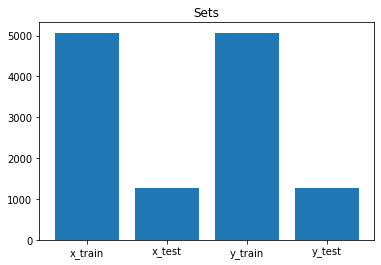

In [59]:
y_values = [len(x_train), len(x_test), len(y_train), len(y_test)]
x_labels = ['x_train', 'x_test', 'y_train', 'y_test']
plt.title('Sets')
plt.bar(x_labels, y_values);

Using TfidfVectorizer

In [60]:
# TfidfVectorizer() convert a collection of raw documents to a matrix of TF-IDF features
# 'english' is passed to _check_stop_list which returns appropriate required stop list
# max_df = 0.7 means "ignore terms that appear in more than 70% of the documents"
vectors = TfidfVectorizer(stop_words='english', max_df=0.7)

In [61]:
# fit_transform() learns the vocabulary and idf and returns term-document matrix
# transform() transform documents to document-term matrix.
t_train = vectors.fit_transform(x_train)
t_test = vectors.transform(x_test)

In [62]:
t_train.shape

(5068, 61651)

In [63]:
# max_iter is used to set the maximum number of passes over the training data (aka epochs)
# fit() fits the linear model with Passive Aggressive algorithm
pred_model = PassiveAggressiveClassifier(max_iter=50)
pred_model.fit(t_train, y_train);

In [64]:
# predict() predicts the class labels for samples in t_test
# accuracy_score() is used to measure model's accuracy by passing it known values and predicted values
y_pred = pred_model.predict(t_test)
score = accuracy_score(y_test, y_pred);

In [65]:
# confusion_matrix() generates confusion matrix to evaluate the accuracy of a classification
# confusion matrix is a table with two rows and two columns that reports the number of false positives,
# false negatives, true positives, and true negatives.
con_mat = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

In [66]:
# Finally, printing out the result
print("Accuracy : " + str(score))
print("Confusion Matrix:-\n" + str(con_mat))
print("True Positives : " + str(con_mat[0][0]) + "\nTrue Negatives : " + str(con_mat[1][1]))
print("False Positives : " + str(con_mat[1][0]) + "\nFalse Negatives : " + str(con_mat[0][1]))

Accuracy : 0.9242304656669298
Confusion Matrix:-
[[587  51]
 [ 45 584]]
True Positives : 587
True Negatives : 584
False Positives : 45
False Negatives : 51


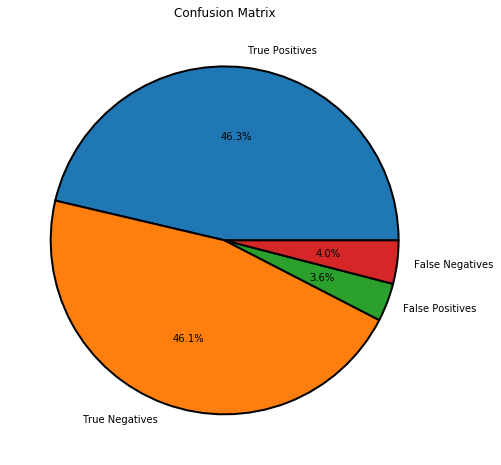

In [67]:
labels = 'True Positives', 'True Negatives', 'False Positives', 'False Negatives'
sizes = [con_mat[0][0], con_mat[1][1], con_mat[1][0], con_mat[0][1]]
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix')
plt.pie(sizes,
      labels=labels,
      autopct='%1.1f%%',
      wedgeprops={"edgecolor":"k",
                  'linewidth': 2,
                  'antialiased': True});